# configuration

In [1]:
import configparser

In [2]:
config1 = configparser.ConfigParser()
config2 = configparser.ConfigParser()

In [3]:
config1.read('./configurations/PEMS04_astgcn.conf')
config2.read('./configurations/PEMS08_astgcn.conf')

['./configurations/PEMS08_astgcn.conf']

In [4]:
for key in config1['Data'].items():
    print(key)
print('\n')
for key in config2['Data'].items():
    print(key)

('adj_filename', './data/PEMS04/distance.csv')
('graph_signal_matrix_filename', './data/PEMS04/PEMS04.npz')
('num_of_vertices', '307')
('points_per_hour', '12')
('num_for_predict', '12')
('len_input', '12')
('dataset_name', 'PEMS04')


('adj_filename', './data/PEMS08/distance.csv')
('graph_signal_matrix_filename', './data/PEMS04/PEMS08.npz')
('num_of_vertices', '170')
('points_per_hour', '12')
('num_for_predict', '12')
('len_input', '12')
('dataset_name', 'PEMS08')


In [ ]:
配置
配置文件 config.conf 包含三个部分：Data、Training 和 Predict：

数据
adj_filename：邻接矩阵文件的路径
graph_signal_matrix_filename：图形信号矩阵文件的路径
num_of_vertices：顶点数
points_per_hour：每小时点数，在我们的数据集中是 12
num_for_predict：要预测的点数，在我们的模型中是 12
训练
型号名称：ASTGCN 或 MSTGCN
ctx：set ctx = cpu，或者设置gpu-0，表示第一个gpu设备
优化器：sgd、RMSprop、adam，更多优化器请参见此页面
learning_rate：浮动，如 0.0001
epochs：int，要训练的时期
批量大小：整数
num_of_weeks：int，将使用多少周的数据
num_of_days：int，将使用多少天的数据
num_of_hours：int，将使用多少小时的数据
K：int，将使用 K 阶切比雪夫多项式
merge：int，0或1，如果merge等于1，合并训练集和验证集训练模型
prediction_filename: str，如果你指定这个参数，它会将当前测试集的预测保存到这个文件中
params_dir：保存参数的文件夹

# data

In [5]:
import numpy as np
import pandas as pd

In [6]:
distance1 = pd.read_csv('./data/PEMS04/distance.csv')
distance2 = pd.read_csv('./data/PEMS08/distance.csv')
data1 = np.load('./data/PEMS04/pems04.npz')
data2 = np.load('./data/PEMS08/pems08.npz')

In [9]:
data1

AttributeError: 'NpzFile' object has no attribute 'tolist'

In [7]:
print(distance1.shape)
print(distance2.shape)

(340, 3)
(295, 3)


In [62]:
distance1 #应该是节点i到节点j的距离（from:i,to:j,cost:distance，为什么不是方阵，因为有些节点不具有之间不具有连接性

#其长度就是edges的模

from   to   cost
0      73    5  352.6
1       5  154  347.2
2     154  263  392.9
3     263   56  440.8
4      56   96  374.6
..    ...  ...    ...
335    46  216  353.6
336   217   98  411.7
337    98   31    3.2
338   217   46  354.0
339    46   31  163.6

[340 rows x 3 columns]

In [68]:
distance1.describe()
#最大节点编号306，对应总共170个节点的最后一个索引，最小节点编号为0

from          to         cost
count  340.000000  340.000000   340.000000
mean   149.544118  146.241176   410.300588
std     88.341793   89.092511   257.518655
min      0.000000    0.000000     3.200000
25%     71.750000   66.750000   328.775000
50%    144.500000  139.500000   367.150000
75%    229.250000  226.500000   422.300000
max    305.000000  306.000000  2712.100000

In [64]:
distance2.describe()
#最大节点编号169，对应总共307个节点的最后一个索引，最小节点编号为0

from          to         cost
count  295.000000  295.000000   295.000000
mean    82.376271   85.118644   315.895254
std     51.902487   51.507177   216.686639
min      1.000000    0.000000     6.300000
25%     33.500000   40.000000   240.300000
50%     82.000000   85.000000   328.100000
75%    127.000000  132.000000   372.150000
max    169.000000  169.000000  3274.400000

In [70]:
distance1['cost']/distance1['cost'].max()

0      0.130010
1      0.128019
2      0.144869
3      0.162531
4      0.138122
         ...   
335    0.130379
336    0.151801
337    0.001180
338    0.130526
339    0.060322
Name: cost, Length: 340, dtype: float64

In [88]:
distance1['cost'].describe()

count     340.000000
mean      410.300588
std       257.518655
min         3.200000
25%       328.775000
50%       367.150000
75%       422.300000
max      2712.100000
Name: cost, dtype: float64

In [79]:
distance1['weight'].describe()

count    340.000000
mean       0.151285
std        0.094952
min        0.001180
25%        0.121225
50%        0.135375
75%        0.155710
max        1.000000
Name: weight, dtype: float64

In [3]:
distance1['weight']= (distance1['cost']-distance1['cost'].min())/(distance1['cost'].max()-distance1['cost'].min())

In [4]:
distance2['weight']= (distance2['cost']-distance2['cost'].min())/(distance2['cost'].max()-distance2['cost'].min())

In [137]:
distance1['weight'].describe()

count    340.000000
mean       0.150283
std        0.095064
min        0.000000
25%        0.120187
50%        0.134353
75%        0.154712
max        1.000000
Name: weight, dtype: float64

In [182]:
distance2['weight'].describe()

count    295.000000
mean       0.094732
std        0.066304
min        0.000000
25%        0.071601
50%        0.098467
75%        0.111946
max        1.000000
Name: weight, dtype: float64

In [15]:
def networks_draw(distance, figsize=(10,6), save_path='./fig/PEMS04节点网络'):
    #标准化权重
    distance['weight']=(distance['cost']-distance['cost'].min())/(distance['cost'].max()-distance['cost'].min())
    plt.figure(figsize=figsize)
    plt.rcParams['font.sans-serif']=['Times New Roman']
    
    #社交网络图初始化
    G = nx.Graph()
    #添加边
    for i in distance.index:
        G.add_edge(distance['from'][i],distance1['to'][i],weight=distance['weight'][i])
    
    #定义3种不同的边
    elarge = [(u,v) for (u,v,d) in G.edges(data=True) if d['weight']>0.11]
    emidle = [(u,v) for (u,v,d) in G.edges(data=True) if (d['weight']>0.094 )&( d['weight']<=0.11)]
    esmall =  [(u,v) for (u,v,d) in G.edges(data=True) if d['weight']<=0.094]
    # 图的布局
    pos=nx.spring_layout(G)
    #pos=nx.circular_layout(G)
    # pos=nx.random_layout(G)
    #计算中心度
    Gdegree=nx.degree(G)
    Gdegree=dict(Gdegree)
    Gdegree=pd.DataFrame({'name':list(Gdegree.keys()),'degree':list(Gdegree.values())})
    print(Gdegree)
    
    #依据出度和入度进行节点大小的设置
    nx.draw_networkx_nodes(G,pos,alpha=0.6,node_size=Gdegree.degree * 50,node_color = Gdegree.degree) 
    #edge
    nx.draw_networkx_edges(G,pos,edgelist=elarge,width=0.1,alpha=0.5,edge_color='r')
    nx.draw_networkx_edges(G,pos,edgelist=emidle,width=0.2,alpha=0.5,edge_color='b')
    # nx.draw_networkx_edges(G,pos,edgelist=esmall,width=2,alpha=1,edge_color='y',style='dashed')
    nx.draw_networkx_edges(G,pos,edgelist=esmall,width=0.5,alpha=1,edge_color='y')
    nx.draw_networkx_labels(G,pos,font_size=7)
    
    plt.axis('off')
    # plt.title('PEMS04节点网络')
    plt.savefig(save_path,dpi=300,bbox_inches='tight')
    plt.show()
    return Gdegree

In [12]:
def cbar(Gdegree,figsize=(0.2,6),save_path='./fig/PEMS04_nodeDegree.png'):
    import copy
    import numpy as np
    import matplotlib as mpl
    fig, axes=plt.subplots(1,1,figsize=figsize)
    cmap = copy.copy(mpl.cm.viridis)
    norm = mpl.colors.Normalize(vmin=Gdegree['degree'].min(), vmax=Gdegree['degree'].max())
    im = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
    cbar = fig.colorbar(
        im, cax=axes, orientation='vertical',
        ticks=np.linspace(Gdegree['degree'].min(), Gdegree['degree'].max(),7))
    axes.set_title('node degree')
    plt.savefig(save_path,dpi=300,bbox_inches='tight')

     name  degree
0      73       1
1       5       2
2     154       2
3     263       2
4      56       2
..    ...     ...
302   277       1
303   257       1
304   275       1
305   251       2
306    85       2

[307 rows x 2 columns]


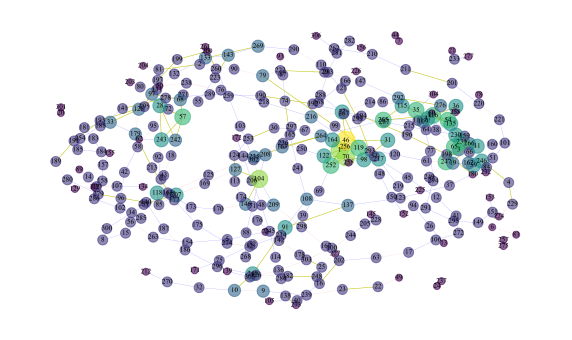

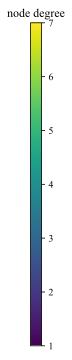

In [14]:
# plt.use.style('seaborn-poster')
import copy
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx
import d2l.torch as d2l
d2l.use_svg_display()
Gdegree1 =networks_draw(distance1, figsize=(10,6), save_path='./fig/PEMS04节点网络')
cbar(Gdegree1,figsize=(0.2,6),save_path='./fig/PEMS04_nodeDegree.png')

In [ ]:
distance2

from   to   cost    weight
0       9  153  310.6  0.093112
1     153   62  330.9  0.099324
2      62  111  332.9  0.099936
3     111   11  324.2  0.097274
4      11   28  336.0  0.100884
..    ...  ...    ...       ...
290   154    5  166.3  0.048958
291    78  107  143.9  0.042104
292   107   46  236.3  0.070377
293   118  145  250.6  0.074753
294   145   96   85.1  0.024112

[295 rows x 4 columns]

     name  degree
0       9       4
1       5       2
2     153       4
3     154       3
4      62       3
..    ...     ...
287   202       1
288   233       1
289   277       1
290   275       1
291   266       1

[292 rows x 2 columns]


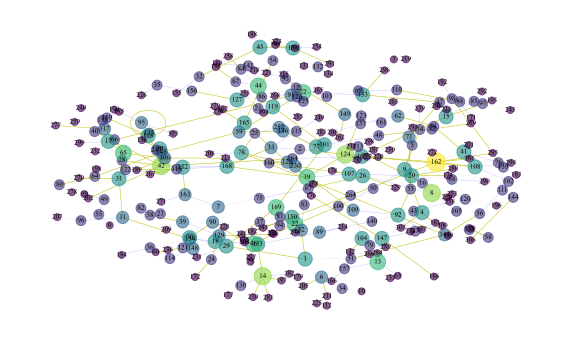

In [16]:
# plt.style.use('seaborn-paper')
Gdegree2 =networks_draw(distance2, figsize=(10,6), save_path='./fig/PEMS08节点网络')
# cbar(Gdegree2,figsize=(0.2,6),save_path='./fig/PEMS08_nodeDegree.png')

In [ ]:
cbar(Gdegree2,figsize=(0.2,6),save_path='./fig/PEMS08_nodeDegree.png')

In [10]:
data1.files

['data']

In [13]:
data1['data']

array([[[6.20e+01, 7.70e-03, 6.79e+01],
        [5.60e+01, 1.12e-02, 6.84e+01],
        [9.00e+01, 1.43e-02, 6.82e+01],
        ...,
        [5.60e+01, 9.80e-03, 6.74e+01],
        [4.80e+01, 7.80e-03, 6.95e+01],
        [3.80e+01, 9.40e-03, 6.82e+01]],

       [[6.10e+01, 7.40e-03, 6.73e+01],
        [4.00e+01, 8.00e-03, 6.86e+01],
        [9.40e+01, 1.56e-02, 6.78e+01],
        ...,
        [5.10e+01, 9.40e-03, 6.60e+01],
        [3.00e+01, 5.00e-03, 6.91e+01],
        [3.50e+01, 8.50e-03, 6.88e+01]],

       [[7.10e+01, 9.30e-03, 6.84e+01],
        [2.80e+01, 6.80e-03, 6.74e+01],
        [7.90e+01, 1.22e-02, 6.87e+01],
        ...,
        [6.70e+01, 1.17e-02, 6.67e+01],
        [3.10e+01, 5.30e-03, 6.88e+01],
        [4.50e+01, 1.11e-02, 6.95e+01]],

       ...,

       [[6.60e+01, 8.90e-03, 6.78e+01],
        [7.60e+01, 1.58e-02, 6.59e+01],
        [7.70e+01, 1.82e-02, 6.40e+01],
        ...,
        [8.50e+01, 1.45e-02, 6.73e+01],
        [5.80e+01, 1.00e-02, 6.93e+01],
        [

In [11]:
data1['data'].shape

(16992, 307, 3)

In [21]:
data2['data'].shape

(17856, 170, 3)

In [16]:
import matplotlib.pyplot as plt

In [21]:
# total flow, average speed, and average occupancy.

array([62., 61., 71., ..., 66., 77., 74.])

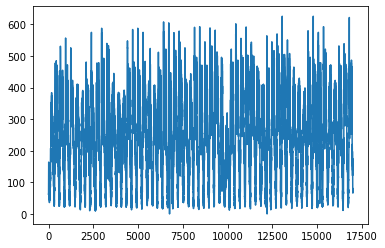

In [22]:
plt.plot(data1['data'][:,0,0])# total flow:总流量

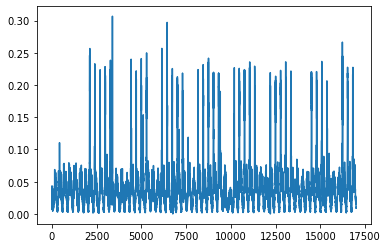

In [23]:
plt.plot(data1['data'][:,0,1])# average speed

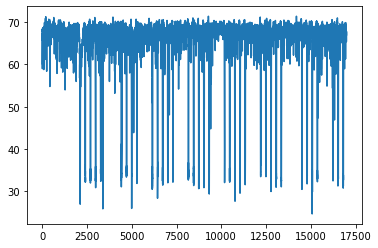

In [24]:
plt.plot(data1['data'][:,0,2]) # 

# lib

## metrics.py

用来计算mape

In [23]:
# -*- coding:utf-8 -*-

import numpy as np
# 主要是来求mape，并处理对应为nan或者无穷大的情况，即y_true接近于0
def masked_mape_np(y_true, y_pred, null_val=np.nan):
    with np.errstate(divide='ignore', invalid='ignore'):
        if np.isnan(null_val):
            mask = ~np.isnan(y_true)# 非nan，即y_true =nan,则mask为0，否则为1
        else:
            mask = np.not_equal(y_true, null_val) #判断y_true与null_val是否不等,等为False,不等为True
        mask = mask.astype('float32')
        mask /= np.mean(mask) #标准化
        mape = np.abs(np.divide(np.subtract(y_pred, y_true).astype('float32'),
                      y_true))
        mape = np.nan_to_num(mask * mape) #mask为或者 = sum(mask)
        return np.mean(mape) * 100

*  numpy.errstate用于浮点错误的上下管理器：允许该上下文种的语句以已知的错误处理执行
*  错误处理方式为seterr和 seterrcall
* 可能的值为 {‘ignore’, ‘warn’, ‘raise’, ‘call’, ‘print’, ‘log’}
* np.subtract(y_pred, y_true) == y_pred-y_true
* np.divide(np.subtract(y_pred, y_true).astype('float32'),y_true) = (y_pred-y_true)/y_true
* np.nan_to_num(x)使用0代替x中nan的元素，使用有限的数字代替inf元素，x:标量或者array

# utilis.py

In [56]:
# 反归一化
def re_normalization(x, mean, std):
    x = x * std + mean
    return x

In [58]:
# 标准化
def max_min_normalization(x, _max, _min):
    x = 1. * (x - _min)/(_max - _min)
    x = x * 2. - 1.
    return x

* -->2x-2x_min-x_max+x_min=2x-(x_min+x_max)
* -->[(x-x_min)+(x-x_max)]/(x_max-xmin)
* 效果就是如果x偏x_max一点，它为正，如果x偏x_min一点他为负

In [59]:
#反标准化
def re_max_min_normalization(x, _max, _min):
    x = (x + 1.) / 2.
    x = 1. * x * (_max - _min) + _min
    return x

注意这里的x_max,x_min是初始序列x的max与min不是变换后的

In [61]:
def get_adjacency_matrix(distance_df_filename, num_of_vertices, id_filename=None):
    '''
    Parameters
    ----------
    distance_df_filename: str, path of the csv file contains edges information

    num_of_vertices: int, the number of vertices

    Returns
    ----------
    A: np.ndarray, adjacency matrix

    '''
    if 'npy' in distance_df_filename:

        adj_mx = np.load(distance_df_filename)

        return adj_mx, None

    else:

        import csv

        A = np.zeros((int(num_of_vertices), int(num_of_vertices)),
                     dtype=np.float32)

        distaneA = np.zeros((int(num_of_vertices), int(num_of_vertices)),
                            dtype=np.float32)

        if id_filename:

            with open(id_filename, 'r') as f:
                id_dict = {int(i): idx for idx, i in enumerate(f.read().strip().split('\n'))}  # 把节点id（idx）映射成从0开始的索引

            with open(distance_df_filename, 'r') as f:
                f.readline()
                reader = csv.reader(f)
                for row in reader:
                    if len(row) != 3:
                        continue
                    i, j, distance = int(row[0]), int(row[1]), float(row[2])
                    A[id_dict[i], id_dict[j]] = 1
                    distaneA[id_dict[i], id_dict[j]] = distance
            return A, distaneA

        else:

            with open(distance_df_filename, 'r') as f:
                f.readline()
                reader = csv.reader(f)
                for row in reader:
                    if len(row) != 3:
                        continue
                    i, j, distance = int(row[0]), int(row[1]), float(row[2])
                    A[i, j] = 1
                    distaneA[i, j] = distance
            return A, distaneA

In [42]:
import pandas as pd
num_of_vertices = 307
A = np.zeros((int(num_of_vertices), int(num_of_vertices)),
                     dtype=np.float32)

distaneA = np.zeros((int(num_of_vertices), int(num_of_vertices)),
                    dtype=np.float32)
distance=pd.read_csv('F:\广义时空回归图卷积神经网络\GSTRGCT\data\PEMS04\distance.csv')
from_ = distance['from']
to_ = distance['to']
cost_ = distance['cost']
for i in range(len(distance)):
    from_index = from_[i]
    to_index = to_[i]
    cost = cost_[i]
    A[from_index,to_index]=1
    distaneA[from_index,to_index]=cost



In [47]:
distaneA.shape

(307, 307)

In [32]:
A.shape

(307, 307)

In [ ]:
def weight_matrix(distanceA, sigma2=10, epsilon=0.5, scaling=True):
    '''
    Load weight matrix function.
    :param file_path: str, the path of saved weight matrix file.
    :param sigma2: float, scalar of matrix W.
    :param epsilon: float, thresholds to control the sparsity of matrix W.
    :param scaling: bool, whether applies numerical scaling on W.
    :return: np.ndarray, [n_route, n_route].
    '''
    try:
        W = pd.read_csv(file_path, header=None).values
    except FileNotFoundError:
        print(f'ERROR: input file was not found in {file_path}.')

    # check whether W is a 0/1 matrix.
    if set(np.unique(W)) == {0, 1}:
        print('The input graph is a 0/1 matrix; set "scaling" to False.')
        scaling = False

    if scaling:
        W = distanceA
        n = W.shape[0]
        W = W / 10000.
        # W = W 
        W2, W_mask = W * W, np.ones([n, n]) - np.identity(n)
        # refer to Eq.10
        return np.exp(-W2 / sigma2) * (np.exp(-W2 / sigma2) >= epsilon) * W_mask
    else:
        return W

In [1]:
import numpy as np

In [4]:
W=np.random.random((5,5))

In [5]:
W

array([[0.79574416, 0.71453661, 0.39990444, 0.52101237, 0.61956772],
       [0.9363546 , 0.38333285, 0.08234699, 0.71505165, 0.00523032],
       [0.57140949, 0.9686126 , 0.78943869, 0.50547849, 0.04212719],
       [0.45111864, 0.15654865, 0.92638387, 0.34034062, 0.53714986],
       [0.52789596, 0.73336872, 0.47508266, 0.29071061, 0.34424334]])

In [7]:
np.diag(np.sum(W,axis=1))

array([[3.05076529, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 2.12231641, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 2.87706647, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 2.41154164, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 2.37130128]])

In [8]:
L= np.diag(np.sum(W,axis=1))-W

In [9]:
L

array([[ 2.25502113, -0.71453661, -0.39990444, -0.52101237, -0.61956772],
       [-0.9363546 ,  1.73898356, -0.08234699, -0.71505165, -0.00523032],
       [-0.57140949, -0.9686126 ,  2.08762777, -0.50547849, -0.04212719],
       [-0.45111864, -0.15654865, -0.92638387,  2.07120102, -0.53714986],
       [-0.52789596, -0.73336872, -0.47508266, -0.29071061,  2.02705794]])

In [12]:
from scipy.sparse.linalg import eigs

返回邻接矩阵，距离矩阵，只有邻接矩阵为1的含列索引对应距离矩阵的地方才有距离值，否则为0

In [14]:
def scaled_Laplacian(W):
    '''
    compute \tilde{L}

    Parameters
    ----------
    W: np.ndarray, shape is (N, N), N is the num of vertices

    Returns
    ----------
    scaled_Laplacian: np.ndarray, shape (N, N)

    '''

    assert W.shape[0] == W.shape[1]

    D = np.diag(np.sum(W, axis=1)) #度矩阵，是对角矩阵，对角元素为每个节点的度，即有多少个节点与其连接

    L = D - W

    lambda_max = eigs(L, k=1, which='LR')[0].real #返回的是实数部分

    return (2 * L) / lambda_max - np.identity(W.shape[0])


In [15]:
L_tilde = scaled_Laplacian(W)

In [16]:
L_tilde 

array([[ 0.55750019, -0.49351684, -0.27620639, -0.35985333, -0.42792363],
       [-0.64672231,  0.20108286, -0.0568755 , -0.49387257, -0.00361248],
       [-0.39466166, -0.66900229,  0.44188478, -0.34912438, -0.02909645],
       [-0.31157906, -0.10812518, -0.63983571,  0.43053914, -0.37099919],
       [-0.36460769, -0.50652382, -0.32813055, -0.20078829,  0.40005035]])

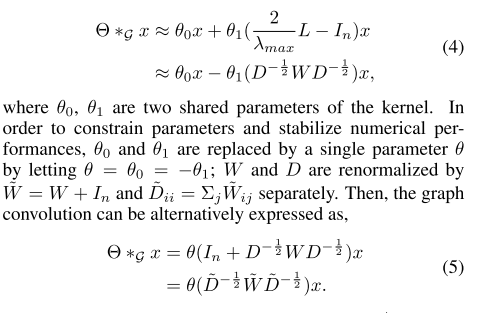

scipy.sparse.linalg.eigs(A,k=6,...)
求平方矩阵A的k个特征值和特征向量。

In [65]:
from scipy.sparse.linalg import eigs
id = np.eye(13)
vals, vecs = eigs(id, k=6,which='LR')

In [17]:
len(np.random.random((5,4,3)))

5

In [18]:
W

array([[0.79574416, 0.71453661, 0.39990444, 0.52101237, 0.61956772],
       [0.9363546 , 0.38333285, 0.08234699, 0.71505165, 0.00523032],
       [0.57140949, 0.9686126 , 0.78943869, 0.50547849, 0.04212719],
       [0.45111864, 0.15654865, 0.92638387, 0.34034062, 0.53714986],
       [0.52789596, 0.73336872, 0.47508266, 0.29071061, 0.34424334]])

In [24]:
np.load('/home/zw100/广义时空回归图卷积神经网络/GSTRGCT/data/pems04/pems04.npz')

ValueError: Cannot load file containing pickled data when allow_pickle=False

In [ ]:
def cheb_polynomial(L_tilde, K):
    '''
    compute a list of chebyshev polynomials from T_0 to T_{K-1}

    Parameters
    ----------
    L_tilde: scaled Laplacian, np.ndarray, shape (N, N)

    K: the maximum order of chebyshev polynomials

    Returns
    ----------
    cheb_polynomials: list(np.ndarray), length: K, from T_0 to T_{K-1}

    '''

    N = L_tilde.shape[0]

    cheb_polynomials = [np.identity(N), L_tilde.copy()]

    for i in range(2, K):
        cheb_polynomials.append(2 * L_tilde * cheb_polynomials[i - 1] - cheb_polynomials[i - 2])

    return cheb_polynomials

* 切比雪夫多项式
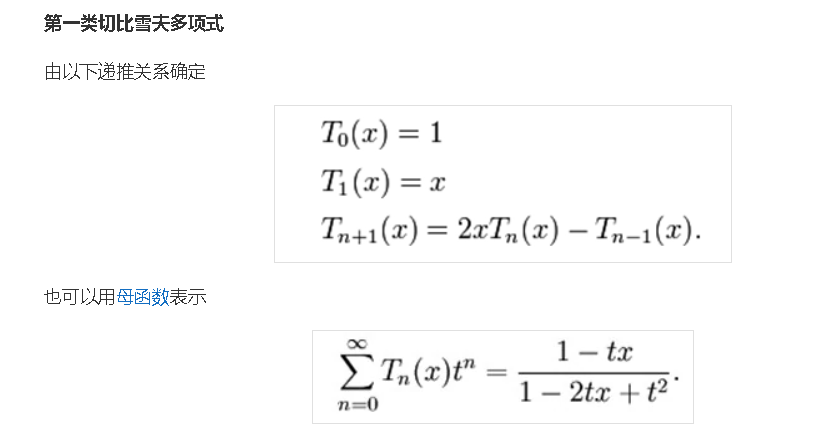

**这里的用处尚未知晓**

In [79]:
def load_graphdata_channel1(graph_signal_matrix_filename, num_of_hours, num_of_days, num_of_weeks, DEVICE, batch_size, shuffle=True):
    '''
    这个是为PEMS的数据准备的函数
    将x,y都处理成归一化到[-1,1]之前的数据;
    每个样本同时包含所有监测点的数据，所以本函数构造的数据输入时空序列预测模型；
    该函数会把hour, day, week的时间串起来；
    注： 从文件读入的数据，x是最大最小归一化的，但是y是真实值
    这个函数转为mstgcn，astgcn设计，返回的数据x都是通过减均值除方差进行归一化的，y都是真实值
    :param graph_signal_matrix_filename: str
    :param num_of_hours: int
    :param num_of_days: int
    :param num_of_weeks: int
    :param DEVICE:
    :param batch_size: int
    :return:
    three DataLoaders, each dataloader contains:
    test_x_tensor: (B, N_nodes, in_feature, T_input)
    test_decoder_input_tensor: (B, N_nodes, T_output)
    test_target_tensor: (B, N_nodes, T_output)

    '''

    file = os.path.basename(graph_signal_matrix_filename).split('.')[0] #返回pems04
    # os.path.basename(graph_signal_matrix_filename)返回pems04.npz

    dirpath = os.path.dirname(graph_signal_matrix_filename)
    # 返回目录：'./data/PEMS04'

    filename = os.path.join(dirpath,
                            file + '_r' + str(num_of_hours) + '_d' + str(num_of_days) + '_w' + str(num_of_weeks)) +'_astcgn'
    #返回'./data/PEMS04/pems04_r' + str(num_of_hours)+...

    print('load file:', filename)
    
    #加载相应处理后命名的数据npz,npz有点类似字典，np.load加载npz,np.files读出字典的key,通过key读取数据，
    file_data = np.load(filename + '.npz') #file_data的key,'train_x','train_target','val_x','val_target','test_x','test_target','mean','std'
    train_x = file_data['train_x']  # (10181, 307, 3, 12),样本个数，节点数，特证数，时序长度（12，说明是1小时的数据，原始数据是每5min钟一个
    train_x = train_x[:, :, 0:1, :] #为什么是0:1,好家伙还是一维变量所以input是（B,307,1,12)
    train_target = file_data['train_target']  # (10181, 307, 12)

    val_x = file_data['val_x']
    val_x = val_x[:, :, 0:1, :]
    val_target = file_data['val_target']

    test_x = file_data['test_x']
    test_x = test_x[:, :, 0:1, :]
    test_target = file_data['test_target']

    mean = file_data['mean'][:, :, 0:1, :]  # (1, 1, 3, 1)
    std = file_data['std'][:, :, 0:1, :]  # (1, 1, 3, 1)

    # ------- train_loader -------
    train_x_tensor = torch.from_numpy(train_x).type(torch.FloatTensor).to(DEVICE)  # (B, N, F, T)
    train_target_tensor = torch.from_numpy(train_target).type(torch.FloatTensor).to(DEVICE)  # (B, N, T)

    train_dataset = torch.utils.data.TensorDataset(train_x_tensor, train_target_tensor)

    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=shuffle)

    # ------- val_loader -------
    val_x_tensor = torch.from_numpy(val_x).type(torch.FloatTensor).to(DEVICE)  # (B, N, F, T)
    val_target_tensor = torch.from_numpy(val_target).type(torch.FloatTensor).to(DEVICE)  # (B, N, T)

    val_dataset = torch.utils.data.TensorDataset(val_x_tensor, val_target_tensor)

    val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    # ------- test_loader -------
    test_x_tensor = torch.from_numpy(test_x).type(torch.FloatTensor).to(DEVICE)  # (B, N, F, T)
    test_target_tensor = torch.from_numpy(test_target).type(torch.FloatTensor).to(DEVICE)  # (B, N, T)

    test_dataset = torch.utils.data.TensorDataset(test_x_tensor, test_target_tensor)

    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    # print
    print('train:', train_x_tensor.size(), train_target_tensor.size())
    print('val:', val_x_tensor.size(), val_target_tensor.size())
    print('test:', test_x_tensor.size(), test_target_tensor.size())

    return train_loader, train_target_tensor, val_loader, val_target_tensor, test_loader, test_target_tensor, mean, std


In [73]:
* os.path.basename()方法返回path最后的文件名
* 如果path以/或\结尾，则返回空值
* os.path.split(path)的第二个元素

* os.path.dirname去掉文件名返回目录

<module 'ntpath' from 'E:\\anaconda\\envs\\pytorch\\lib\\ntpath.py'>

In [76]:
os.path.basename('./data/PEMS04/pems04.npz')

'pems04.npz'

In [77]:
os.path.dirname('./data/PEMS04/pems04.npz')

'./data/PEMS04'

In [80]:
def compute_val_loss_mstgcn(net, val_loader, criterion, sw, epoch, limit=None):
    '''
    for rnn, compute mean loss on validation set
    :param net: model
    :param val_loader: torch.utils.data.utils.DataLoader
    :param criterion: torch.nn.MSELoss
    :param sw: tensorboardX.SummaryWriter
    :param global_step: int, current global_step
    :param limit: int,
    :return: val_loss
    '''

    net.train(False)  # ensure dropout layers are in evaluation mode

    with torch.no_grad():#无梯度计算直接用train的参数

        val_loader_length = len(val_loader)  # nb of batch

        tmp = []  # 记录了所有batch的loss

        for batch_index, batch_data in enumerate(val_loader):
            encoder_inputs, labels = batch_data# 每个batch的x,y
            outputs = net(encoder_inputs)
            loss = criterion(outputs, labels)  # 计算误差
            tmp.append(loss.item()) #将每个batch的误差放在tmp内
            if batch_index % 100 == 0: #当batch索引数是100的倍数时
                print('validation batch %s / %s, loss: %.2f' % (batch_index + 1, val_loader_length, loss.item()))
            #有限制的记录
            if (limit is not None) and batch_index >= limit:
            
                break#打破循环不在记录损失

        validation_loss = sum(tmp) / len(tmp) #记录平均损失，相当于是该epoch的损失
        sw.add_scalar('validation_loss', validation_loss, epoch)
        #横轴为 epoch,纵轴为validation_loss
        # 可以利用tensorboard --logdir 参数进行图像显示
    return validation_loss

* add_scalar用来保存程序中的数据，然后利用tensorboard工具来进行可是化
* sw.add_scalar('lr'   , optimizer.param_groups[0]['lr'], global_step=global_step)
#生成一个lr名称的二维函数，纵轴为y为“optimizer.param_groups[0][‘lr’]”，横轴为x=global_step。

In [81]:
def evaluate_on_test_mstgcn(net, test_loader, test_target_tensor, sw, epoch, _mean, _std):
    '''
    for rnn, compute MAE, RMSE, MAPE scores of the prediction for every time step on testing set.

    :param net: model
    :param test_loader: torch.utils.data.utils.DataLoader
    :param test_target_tensor: torch.tensor (B, N_nodes, T_output, out_feature)=(B, N_nodes, T_output, 1)
    :param sw:
    :param epoch: int, current epoch
    :param _mean: (1, 1, 3(features), 1)
    :param _std: (1, 1, 3(features), 1)
    '''

    net.train(False)  # ensure dropout layers are in test mode

    with torch.no_grad():

        test_loader_length = len(test_loader)

        test_target_tensor = test_target_tensor.cpu().numpy()

        prediction = []  # 存储所有batch的output

        for batch_index, batch_data in enumerate(test_loader):

            encoder_inputs, labels = batch_data

            outputs = net(encoder_inputs) 

            prediction.append(outputs.detach().cpu().numpy())

            if batch_index % 100 == 0:
                print('predicting testing set batch %s / %s' % (batch_index + 1, test_loader_length))
        # prediction的维度是batch个output
        prediction = np.concatenate(prediction, 0)  # (batch, T', 1)
        prediction_length = prediction.shape[2] #样本个数，节点数，预测长度(特征为1)

        for i in range(prediction_length):#预测第i个时间点的预测误差
            assert test_target_tensor.shape[0] == prediction.shape[0]
            print('current epoch: %s, predict %s points' % (epoch, i))
            mae = mean_absolute_error(test_target_tensor[:, :, i], prediction[:, :, i])
            rmse = mean_squared_error(test_target_tensor[:, :, i], prediction[:, :, i]) ** 0.5
            mape = masked_mape_np(test_target_tensor[:, :, i], prediction[:, :, i], 0)
            print('MAE: %.2f' % (mae))
            print('RMSE: %.2f' % (rmse))
            print('MAPE: %.2f' % (mape))
            print()
            if sw:
                sw.add_scalar('MAE_%s_points' % (i), mae, epoch)
                sw.add_scalar('RMSE_%s_points' % (i), rmse, epoch)
                sw.add_scalar('MAPE_%s_points' % (i), mape, epoch)


In [82]:
def predict_and_save_results_mstgcn(net, data_loader, data_target_tensor, global_step, _mean, _std, params_path, type):
    '''

    :param net: nn.Module
    :param data_loader: torch.utils.data.utils.DataLoader
    :param data_target_tensor: tensor
    :param epoch: int
    :param _mean: (1, 1, 3, 1)
    :param _std: (1, 1, 3, 1)
    :param params_path: the path for saving the results
    :return:
    '''
    net.train(False)  # ensure dropout layers are in test mode

    with torch.no_grad():

        data_target_tensor = data_target_tensor.cpu().numpy()

        loader_length = len(data_loader)  # nb of batch

        prediction = []  # 存储所有batch的output

        input = []  # 存储所有batch的input

        for batch_index, batch_data in enumerate(data_loader):

            encoder_inputs, labels = batch_data

            input.append(encoder_inputs[:, :, 0:1].cpu().numpy())  # (batch, T', 1)

            outputs = net(encoder_inputs)

            prediction.append(outputs.detach().cpu().numpy())

            if batch_index % 100 == 0:
                print('predicting data set batch %s / %s' % (batch_index + 1, loader_length))

        input = np.concatenate(input, 0)
        # 反归一化

        input = re_normalization(input, _mean, _std)

        prediction = np.concatenate(prediction, 0)  # (batch, T', 1)

        print('input:', input.shape)
        print('prediction:', prediction.shape)
        print('data_target_tensor:', data_target_tensor.shape)
        output_filename = os.path.join(params_path, 'output_epoch_%s_%s' % (global_step, type))
        np.savez(output_filename, input=input, prediction=prediction, data_target_tensor=data_target_tensor)

        # 计算误差
        excel_list = []
        prediction_length = prediction.shape[2] #预测的长度

        for i in range(prediction_length):
            assert data_target_tensor.shape[0] == prediction.shape[0] ##样本个数
            print('current epoch: %s, predict %s points' % (global_step, i))
            mae = mean_absolute_error(data_target_tensor[:, :, i], prediction[:, :, i])
            rmse = mean_squared_error(data_target_tensor[:, :, i], prediction[:, :, i]) ** 0.5
            mape = masked_mape_np(data_target_tensor[:, :, i], prediction[:, :, i], 0)
            print('MAE: %.2f' % (mae))
            print('RMSE: %.2f' % (rmse))
            print('MAPE: %.2f' % (mape))
            excel_list.extend([mae, rmse, mape])

        # print overall results
        mae = mean_absolute_error(data_target_tensor.reshape(-1, 1), prediction.reshape(-1, 1))
        rmse = mean_squared_error(data_target_tensor.reshape(-1, 1), prediction.reshape(-1, 1)) ** 0.5
        mape = masked_mape_np(data_target_tensor.reshape(-1, 1), prediction.reshape(-1, 1), 0)
        print('all MAE: %.2f' % (mae))
        print('all RMSE: %.2f' % (rmse))
        print('all MAPE: %.2f' % (mape))
        excel_list.extend([mae, rmse, mape])
        print(excel_list)


# 重点：model

## ASTGCN_r.py

In [ ]:
class Spatial_Attention_layer(nn.Module):
    '''
    compute spatial attention scores
    '''
    def __init__(self, DEVICE, in_channels, num_of_vertices, num_of_timesteps):
        super(Spatial_Attention_layer, self).__init__()
        self.W1 = nn.Parameter(torch.FloatTensor(num_of_timesteps).to(DEVICE))
        self.W2 = nn.Parameter(torch.FloatTensor(in_channels, num_of_timesteps).to(DEVICE))
        self.W3 = nn.Parameter(torch.FloatTensor(in_channels).to(DEVICE))
        self.bs = nn.Parameter(torch.FloatTensor(1, num_of_vertices, num_of_vertices).to(DEVICE))
        self.Vs = nn.Parameter(torch.FloatTensor(num_of_vertices, num_of_vertices).to(DEVICE))


    def forward(self, x):
        '''
        :param x: (batch_size, N, F_in, T)
        :return: (B,N,N)
        '''

        lhs = torch.matmul(torch.matmul(x, self.W1), self.W2)  # (b,N,F,T)(T)->(b,N,F)(F,T)->(b,N,T)

        rhs = torch.matmul(self.W3, x).transpose(-1, -2)  # (F)(b,N,F,T)->(b,N,T)->(b,T,N)

        product = torch.matmul(lhs, rhs)  # (b,N,T)(b,T,N) -> (B, N, N)

        S = torch.matmul(self.Vs, torch.sigmoid(product + self.bs))  # (N,N)(B, N, N)->(B,N,N)

        S_normalized = F.softmax(S, dim=1)

        return S_normalized